## 3. Cálculo de los rendimientos

Para una sucesión de precios $\{S_t\}_{t=0}^{n}$, el rendimiento simple $R_t$ se define como el el cambio porcentual
$$
R_t=\frac{S_t-S_{t-1}}{S_{t-1}}
$$
para $t=1,\ldots,n$.

Para el ejemplo en curso, la fórmula anterior se puede implementar para todos los precios de cierre de manera simultánea mediante

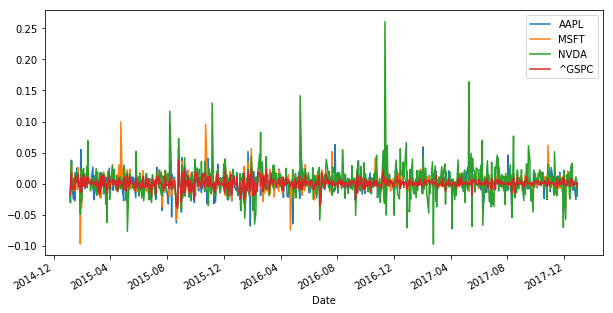

In [48]:
rall.plot(figsize=(10,5));

Notar que, en efecto, las diferencias entre $R_t$ y $r_t$ son muy pequeñas...

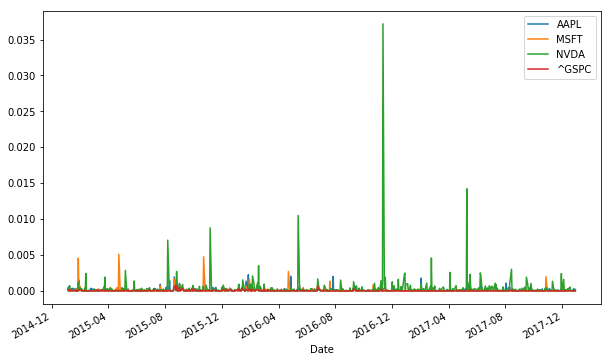

In [49]:
np.abs(rall-Rall).plot(figsize=(10,6));

Escribamos funciones que devuelva los rendimientos diarios (simples y continuamente compuestos), dado un DataFrame de precios...

In [50]:
#rendimientos diarios simples
def simple_daily_ret(closes):
    return closes.pct_change(1).iloc[1:]

def log_dailiy_ret(closes):
    return np.log(closes/closes.shift(1)).iloc[1:]

## ¿Porqué es más usado los rendimientos logarítmicos?

1. **log-normalidad**: si asumimos que los precios se distribuyen log-normalmente, entonces $log( 1 + r_i )$ se distribuye normalmente, lo cual es muy útil ya que muchos teoremas se supone normalidad.
2. Característica más importante es que son **aditivos en el tiempo.**  El producto de variables normalmente distribuidas no es una variable normal. Sin embargo la suma de variables normales no correlacionadas, sí que vuelve a ser una variable normal.
3. la **estabilidad numérica;** la adición de pequeñas cantidades es numéricamente fuerte, mientras que la multiplicación de números pequeños está sujeta a desbordamiento aritmético.

## 4. Gráficos útiles de los rendimientos

Tomemos como ejemplo la serie de precios de cierre de Microsoft y veamos (al menos gráficamente) si los rendimientos si son un proceso estocástico estacionario...

In [51]:
msftAC = closes['MSFT']
msftAC

Date
2015-01-02    42.783936
2015-01-05    42.390499
2015-01-06    41.768314
2015-01-07    42.299000
2015-01-08    43.543350
                ...    
2017-12-22    84.418022
2017-12-26    84.309425
2017-12-27    84.615471
2017-12-28    84.625343
2017-12-29    84.447639
Name: MSFT, Length: 755, dtype: float64

In [52]:
Rmsft = simple_daily_ret(msftAC)

In [53]:
short_rollmean_Rmsft = Rmsft.rolling(window=20).mean()
long_rollmean_Rmsft = Rmsft.rolling(window=100).mean()
short_rollstd_Rmsft = Rmsft.rolling(window=20).std()
long_rollstd_Rmsft = Rmsft.rolling(window=100).std()

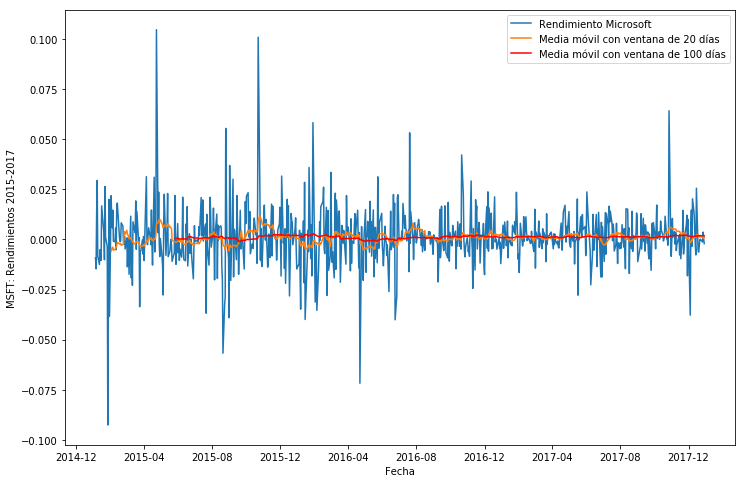

In [54]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1,1,1)
ax.plot(Rmsft.index, Rmsft, label = 'Rendimiento Microsoft')
ax.plot(short_rollmean_Rmsft.index, short_rollmean_Rmsft, label = 'Media móvil con ventana de 20 días')
ax.plot(long_rollmean_Rmsft.index, long_rollmean_Rmsft, 'r', label = 'Media móvil con ventana de 100 días')
ax.set_xlabel('Fecha')
ax.set_ylabel('MSFT: Rendimientos 2015-2017')
ax.legend(loc='best');

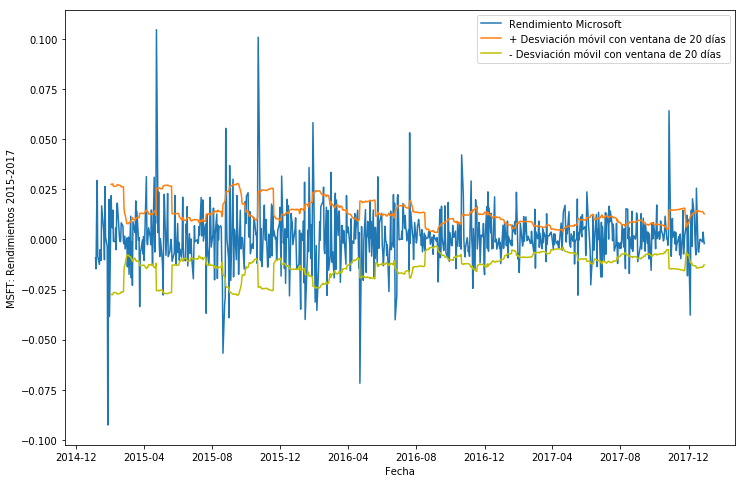

In [55]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1,1,1)
ax.plot(Rmsft.index, Rmsft, label = 'Rendimiento Microsoft')
ax.plot(short_rollstd_Rmsft.index, short_rollstd_Rmsft, label = '+ Desviación móvil con ventana de 20 días')
ax.plot(short_rollstd_Rmsft.index, -short_rollstd_Rmsft, 'y', label = '- Desviación móvil con ventana de 20 días')
ax.set_xlabel('Fecha')
ax.set_ylabel('MSFT: Rendimientos 2015-2017')
ax.legend(loc='best');

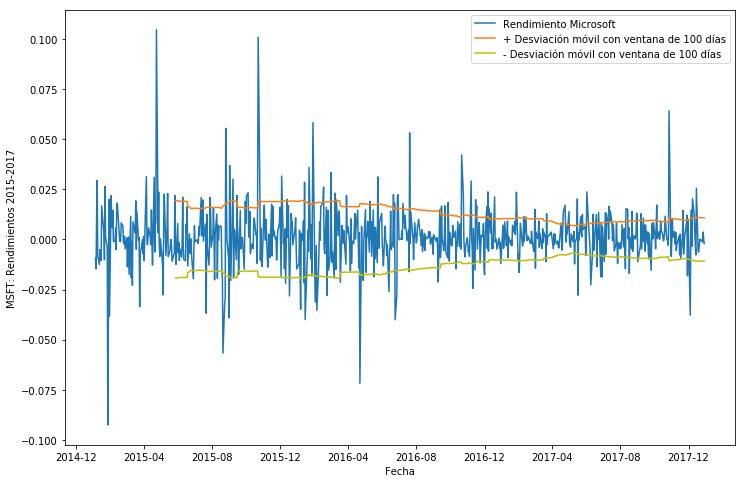

In [56]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1,1,1)
ax.plot(Rmsft.index, Rmsft, label = 'Rendimiento Microsoft')
ax.plot(long_rollstd_Rmsft.index, long_rollstd_Rmsft, label = '+ Desviación móvil con ventana de 100 días')
ax.plot(long_rollstd_Rmsft.index, -long_rollstd_Rmsft, 'y', label = '- Desviación móvil con ventana de 100 días')
ax.set_xlabel('Fecha')
ax.set_ylabel('MSFT: Rendimientos 2015-2017')
ax.legend(loc='best');

No es estacionario...

Justificar simulación.

Se puede verificar también con un gráfico cuantil-cuantil (qq plot)

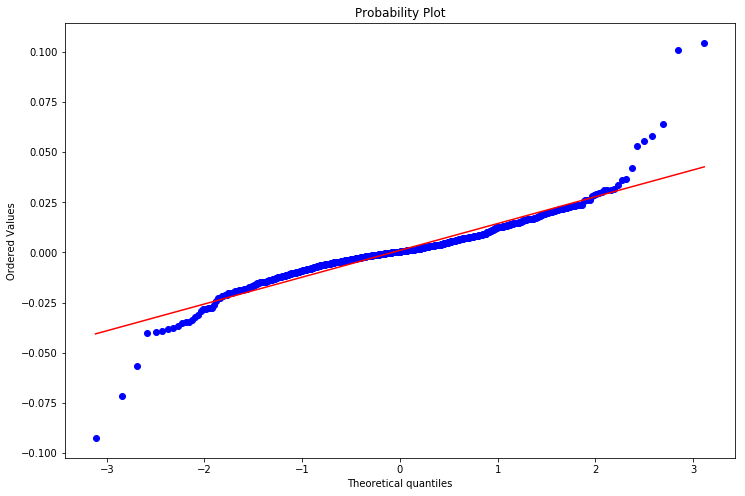

In [57]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1,1,1)
stats.probplot(Rmsft, dist='norm', plot=ax);

Una más, con la librería seaborn... También se pueden instalar paquetes de python desde jupyter, usando el comando `!python -m pip install <package>`, como se ilustra a continuación

In [58]:
!python -m pip install seaborn

In [113]:
import seaborn as sns

Otra manera de instalar una librería, es usar el método clásico de *Anaconda prompt* usando el comando `conda install -c anaconda seaborn`

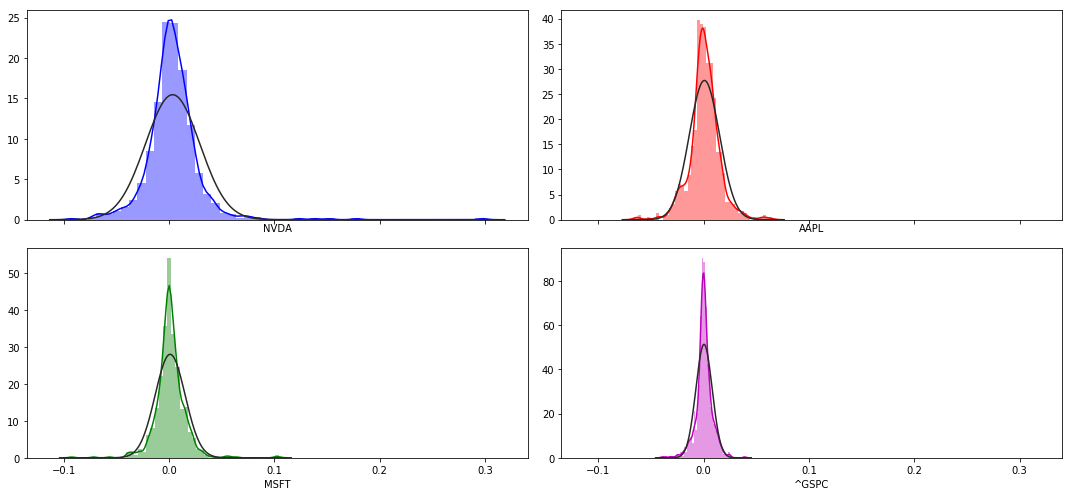

In [114]:
f, axes = plt.subplots(2, 2, figsize=(15, 7), sharex=True)
# Plot a simple histogram with binsize determined automatically
sns.distplot(Rall.loc[:,'NVDA'], color="b", fit=stats.norm, norm_hist=True, ax=axes[0, 0])
sns.distplot(Rall.loc[:,'AAPL'], color="r", fit=stats.norm, norm_hist=True, ax=axes[0, 1])
sns.distplot(Rall.loc[:,'MSFT'], color="g", fit=stats.norm, norm_hist=True, ax=axes[1, 0])
sns.distplot(Rall.loc[:,'^GSPC'], color="m", fit=stats.norm, norm_hist=True, ax=axes[1, 1])
plt.tight_layout()

## 5. Gráficos de correlación

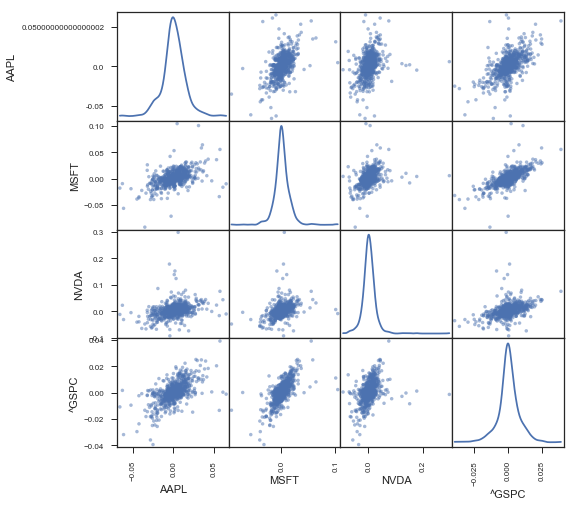

In [65]:
import pandas.plotting as cor
cor.scatter_matrix(Rall, diagonal='kde', alpha=0.5, figsize=(8,8));
# pd.tools.plotting.scatter_matrix(Rall, diagonal='kde', alpha=0.5, figsize=(8,8));

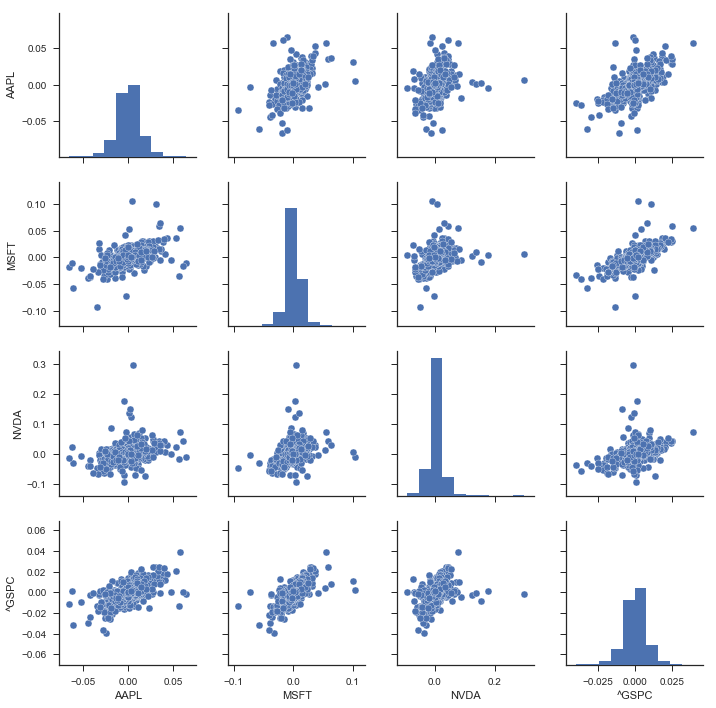

In [62]:
sns.set(style="ticks")
sns.pairplot(Rall);

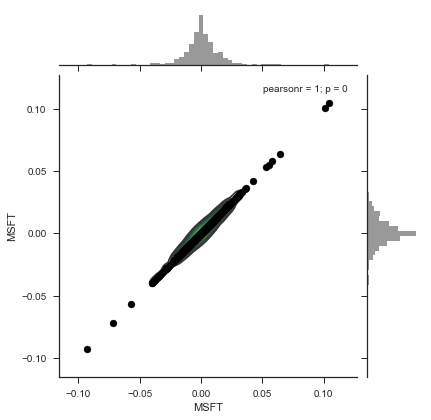

In [63]:
sns.jointplot("MSFT", "MSFT",data=Rall, color="k").plot_joint(sns.kdeplot, zorder=0, n_levels=60);

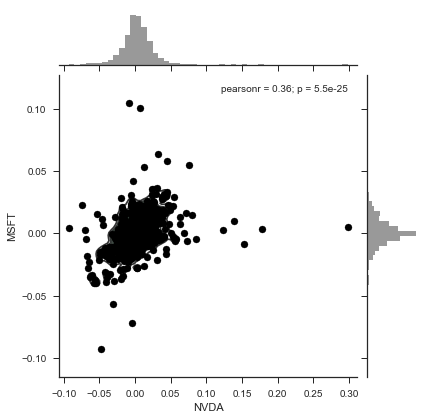

In [66]:
sns.jointplot("NVDA", "MSFT",data=Rall, color="k").plot_joint(sns.kdeplot, zorder=0, n_levels=60);

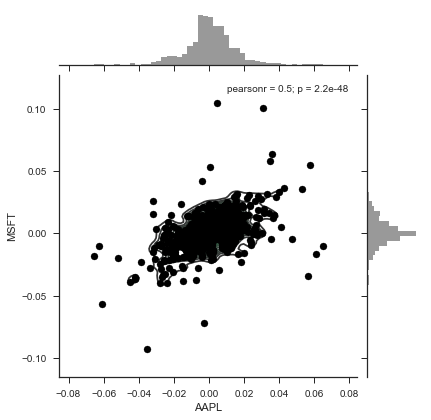

In [67]:
sns.jointplot("AAPL", "MSFT",data=Rall, color="k").plot_joint(sns.kdeplot, zorder=0, n_levels=60);

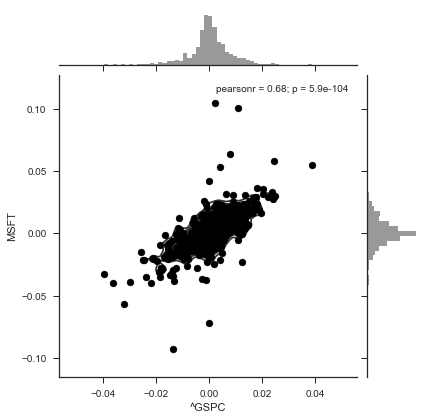

In [68]:
sns.jointplot("^GSPC", "MSFT",data=Rall, color="k").plot_joint(sns.kdeplot, zorder=0, n_levels=60);

In [ ]:
Rall.corr()

In [ ]:
g = sns.PairGrid(Rall, y_vars=["MSFT"], x_vars=["AA", "AAPL", "^GSPC"], size=4)
g.map(sns.regplot, color=".3");